In [28]:
import scanpy as sc
import pandas as pd
import numpy as np

In [38]:
adata_predicted_healthy = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/predicted_codex/predicted_ct_healthy_decoded.h5ad")
adata_predicted_tonsilitis = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/predicted_codex/predicted_ct_tonsilitis_decoded.h5ad")
adata_citeseq_rna_full_genome = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/citeseq/CITEseq_rna_processed_full_genome.h5ad")
adata_citeseq_rna = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/citeseq/CITEseq_rna_processed.h5ad")

In [18]:
adata_citeseq_rna_full_genome

AnnData object with n_obs × n_vars = 42929 × 17288
    obs: 'barcode', 'donor_id', 'subproject', 'gem_id', 'assay', 'sex', 'age', 'age_group', 'hospital', 'nCount_RNA', 'nCount_ADT', 'nFeature_ADT', 'nFeature_RNA', 'pct_mt', 'pct_ribosomal', 'scrublet_doublet_scores', 'scrublet_predicted_doublet', 'S.Score', 'G2M.Score', 'Phase', 'UMAP_1_20220215', 'UMAP_2_20220215', 'bcr_flag', 'tcr_flag', 'RNA.weight', 'ADT.weight', 'annotation_figure_1', 'annotation_prob', 'UMAP_1_level_1', 'UMAP_2_level_1'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_adt.umap', 'X_harmony_RNA', 'X_pca', 'X_rna.umap', 'X_wnn.umap'
    layers: 'X_normalized_10k', 'X_normalized_log'

## Full genome

In [31]:
adata_full_genome = sc.AnnData(X=np.concatenate([adata_predicted_healthy.obsm["X_gexp_log_whole_genome"],
                                                adata_predicted_tonsilitis.obsm["X_gexp_log_whole_genome"],
                                                adata_citeseq_rna_full_genome.X.toarray()], axis=0))

obs = pd.DataFrame({"dataset_type": ["codex healthy" for _ in range(adata_predicted_healthy.shape[0])] + \
                    ["codex tonsilitis" for _ in range(adata_predicted_tonsilitis.shape[0])] + \
                   ["real" for _ in range(adata_citeseq_rna_full_genome.shape[0])]})

adata_full_genome.obs = obs

In [32]:
sc.tl.pca(adata_full_genome)
sc.pp.neighbors(adata_full_genome)
sc.tl.umap(adata_full_genome)

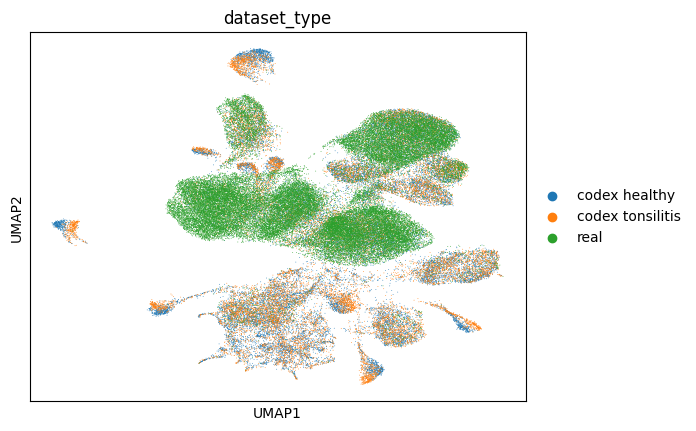

In [33]:
sc.pl.umap(adata_full_genome, color="dataset_type")

## HVGs

In [55]:
adata_hvgs = sc.AnnData(X=np.concatenate([adata_predicted_healthy.obsm["X_gexp_log"],
                                                adata_predicted_tonsilitis.obsm["X_gexp_log"],
                                                adata_citeseq_rna.layers["X_normalized_log"].toarray()], axis=0))

obs = pd.DataFrame({"dataset_type": ["codex healthy" for _ in range(adata_predicted_healthy.shape[0])] + \
                    ["codex tonsilitis" for _ in range(adata_predicted_tonsilitis.shape[0])] + \
                   ["real" for _ in range(adata_citeseq_rna.shape[0])]})

adata_hvgs.obs = obs

In [56]:
sc.tl.pca(adata_hvgs)
sc.pp.neighbors(adata_hvgs)
sc.tl.umap(adata_hvgs)

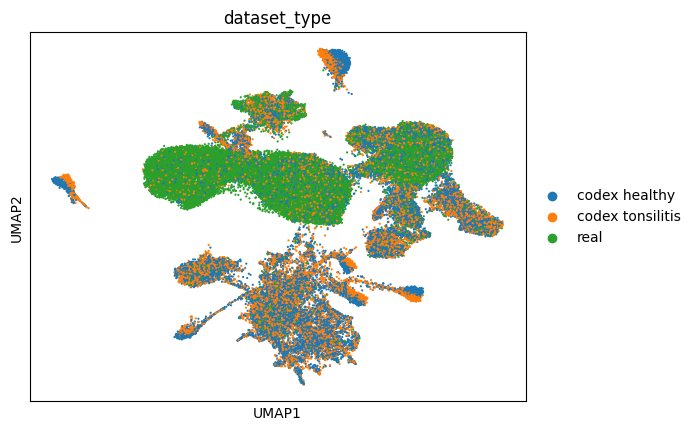

In [59]:
random_order = np.random.permutation(adata_hvgs.n_obs)

sc.pl.umap(adata_hvgs[random_order], color="dataset_type", s=10)

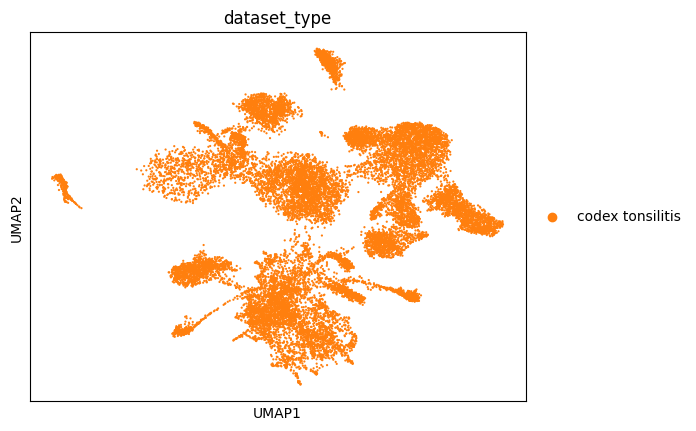

In [63]:
sc.pl.umap(adata_hvgs[adata_hvgs.obs.dataset_type=="codex tonsilitis"], color="dataset_type", s=10)